# Beer sales price regression

In [1]:
# load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# define local functions

def model_fit_summary(formula, df):
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()
    print(res.summary())
    return res

def line_fit(x, y, yp):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'D', markersize=4)
    ax.plot(x, yp, 'r', markersize=4)

def residual_vs_obs(resid):
    res.resid.plot.bar(resid)
    plt.title('Residual-vs-Obs#')
    plt.xlabel('Obs #')
    plt.ylabel('Residual')

def actual_and_predicted_vs_obs(x, y, yp):
    fig, ax = plt.subplots()
    ax.plot(x, y, '-D', markersize=4)
    ax.plot(x, yp, '-ro', markersize=6, mfc='none')

In [3]:
# load data
# wget https://people.duke.edu/~rnau/Regression_example--weekly_beer_sales.xlsx
df = pd.read_excel('Regression_example--weekly_beer_sales.xlsx')

In [4]:
# remove unused values
df.drop('Unnamed: 13', axis=1, inplace=True)
df.drop('Source:', axis=1, inplace=True)
df.drop('http://people.duke.edu/~rnau/forecasting.htm', axis=1, inplace=True)

df = df.rename(columns={'CASES 12PK': 'CASES_12PK', 'CASES 18PK': 'CASES_18PK', 'CASES 30PK': 'CASES_30PK', 'PRICE 12PK': 'PRICE_12PK', 'PRICE 18PK': 'PRICE_18PK', 'PRICE 30PK': 'PRICE_30PK'})

df_ = df.dropna(axis=0)

## 1. Descriptive statistics

In [5]:
# 1.1 a look at first rows
df1 = df_[['Week', 'PRICE_12PK', 'PRICE_18PK', 'PRICE_30PK', 'CASES_12PK', 'CASES_18PK', 'CASES_30PK']]
display(df1.head(4))

,Week,PRICE_12PK,PRICE_18PK,PRICE_30PK,CASES_12PK,CASES_18PK,CASES_30PK
0,1,19.98,14.10,15.19,223.5,439.0,55.00
1,2,19.98,18.65,15.19,215.0,98.0,66.75
2,3,19.98,18.65,13.87,227.5,70.0,242.00
3,4,19.98,18.65,12.83,244.5,52.0,488.50


In [6]:
# 1.2 describe statistics
df1 = df1.drop('Week', axis=1)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE_12PK,52.0,19.087692,2.088128,14.33,19.5925,19.980,20.130,21.28
PRICE_18PK,52.0,16.724615,2.411076,13.26,14.0900,18.650,18.750,19.50
PRICE_30PK,52.0,14.379231,0.805792,12.83,13.7450,14.395,15.190,15.19
CASES_12PK,52.0,399.163462,302.554836,159.00,226.1250,272.500,444.875,1556.50
CASES_18PK,52.0,256.673077,258.825456,32.00,63.0000,88.000,457.000,890.00
CASES_30PK,52.0,165.043269,119.624717,46.50,69.6875,122.750,227.125,568.25


Text(0, 0.5, 'PRICE_30PK')

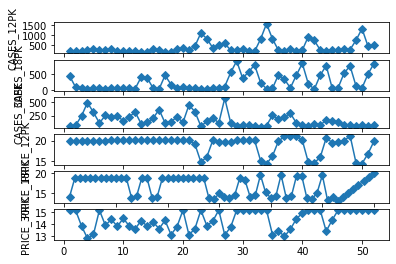

In [7]:
# 1.3 time series plots
fig, ax = plt.subplots(6)
ax[0].plot(df['Week'], df['CASES_12PK'], '-D', markersize=6)
ax[0].set_ylabel('CASES_12PK')
ax[1].plot(df['Week'], df['CASES_18PK'], '-D', markersize=6)
ax[1].set_ylabel('CASES_18PK')
ax[2].plot(df['Week'], df['CASES_30PK'], '-D', markersize=6)
ax[2].set_ylabel('CASES_30PK')
ax[3].plot(df['Week'], df['PRICE_12PK'], '-D', markersize=6)
ax[3].set_ylabel('PRICE_12PK')
ax[4].plot(df['Week'], df['PRICE_18PK'], '-D', markersize=6)
ax[4].set_ylabel('PRICE_18PK')
ax[5].plot(df['Week'], df['PRICE_30PK'], '-D', markersize=6)
ax[5].set_ylabel('PRICE_30PK')

In [8]:
# 1.4 correlation
display(df1.corr().round(3))

,PRICE_12PK,PRICE_18PK,PRICE_30PK,CASES_12PK,CASES_18PK,CASES_30PK
PRICE_12PK,1.000,-0.084,-0.364,-0.859,0.255,0.329
PRICE_18PK,-0.084,1.000,-0.251,0.241,-0.866,0.521
PRICE_30PK,-0.364,-0.251,1.000,0.300,0.294,-0.807
CASES_12PK,-0.859,0.241,0.300,1.000,-0.295,-0.210
CASES_18PK,0.255,-0.866,0.294,-0.295,1.000,-0.458
CASES_30PK,0.329,0.521,-0.807,-0.210,-0.458,1.000


<AxesSubplot:xlabel='[PRICE_30PK]', ylabel='[CASES_30PK]'>

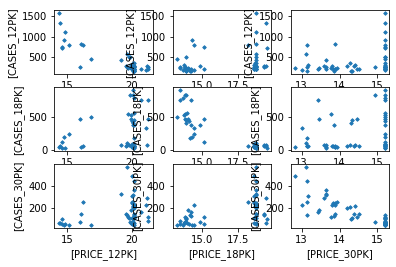

In [9]:
# 1.5 scatter matrix
figure, axes = plt.subplots(3, 3)
df1.plot.scatter(x=['PRICE_12PK'], y=['CASES_12PK'], ax=axes[0,0], marker='D', s=6)
df1.plot.scatter(x=['PRICE_18PK'], y=['CASES_12PK'], ax=axes[0,1], marker='D', s=6)
df1.plot.scatter(x=['PRICE_30PK'], y=['CASES_12PK'], ax=axes[0,2], marker='D', s=6)
df1.plot.scatter(x=['PRICE_12PK'], y=['CASES_18PK'], ax=axes[1,0], marker='D', s=6)
df1.plot.scatter(x=['PRICE_18PK'], y=['CASES_18PK'], ax=axes[1,1], marker='D', s=6)
df1.plot.scatter(x=['PRICE_30PK'], y=['CASES_18PK'], ax=axes[1,2], marker='D', s=6)
df1.plot.scatter(x=['PRICE_12PK'], y=['CASES_30PK'], ax=axes[2,0], marker='D', s=6)
df1.plot.scatter(x=['PRICE_18PK'], y=['CASES_30PK'], ax=axes[2,1], marker='D', s=6)
df1.plot.scatter(x=['PRICE_30PK'], y=['CASES_30PK'], ax=axes[2,2], marker='D', s=6)

## 2. Simplistic model

In [10]:
# 2.1 model fit and summary
formula='CASES_18PK ~ PRICE_18PK'
res = model_fit_summary(formula, df1)
display(f'Std.Err.Reg. {np.sqrt(res.mse_resid).round(3)}')

                            OLS Regression Results                            
Dep. Variable:             CASES_18PK   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     150.5
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.07e-16
Time:                        15:22:04   Log-Likelihood:                -326.09
No. Observations:                  52   AIC:                             656.2
Df Residuals:                      50   BIC:                             660.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1812.1839    128.070     14.150      0.0

'Std.Err.Reg. 130.529'

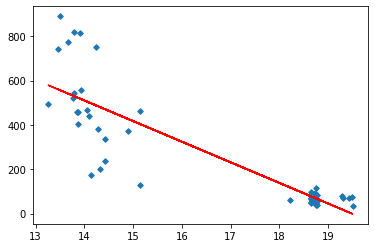

In [11]:
# 2.2 plot line fit
x = df1['PRICE_18PK']
y = df1['CASES_18PK']
yp = res.predict(df1)
line_fit(x, y, yp)

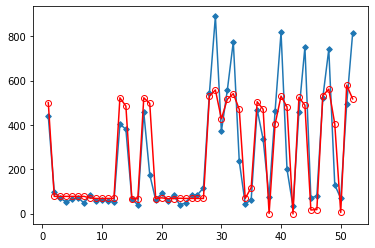

In [12]:
# 2.3 plot actual and predicted time series
x = df['Week'][:len(df1)]
y = df1['CASES_18PK']
yp = res.predict(df1)
actual_and_predicted_vs_obs(x, y, yp)

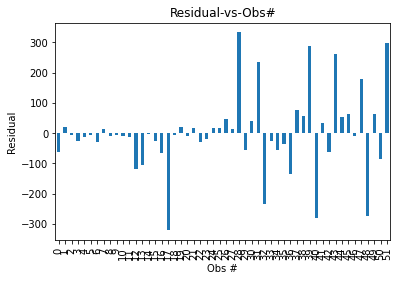

In [13]:
# 2.4 plot residual
residual_vs_obs(res.resid)

## 3. Transformations

In [14]:
# 3.1 prepare frame
df2 = df[['CASES_12PK_LN', 'CASES_18PK_LN', 'CASES_30PK_LN', 'PRICE_12PK_LN', 'PRICE_18PK_LN', 'PRICE_30PK_LN']]

In [15]:
# 3.2 explore

# 3.2.1 correlation
print(df2.corr().round(3))

               CASES_12PK_LN  CASES_18PK_LN  CASES_30PK_LN  PRICE_12PK_LN  \
CASES_12PK_LN          1.000         -0.346         -0.264         -0.851   
CASES_18PK_LN         -0.346          1.000         -0.520          0.254   
CASES_30PK_LN         -0.264         -0.520          1.000          0.436   
PRICE_12PK_LN         -0.851          0.254          0.436          1.000   
PRICE_18PK_LN          0.274         -0.942          0.577         -0.082   
PRICE_30PK_LN          0.303          0.276         -0.859         -0.363   

               PRICE_18PK_LN  PRICE_30PK_LN  
CASES_12PK_LN          0.274          0.303  
CASES_18PK_LN         -0.942          0.276  
CASES_30PK_LN          0.577         -0.859  
PRICE_12PK_LN         -0.082         -0.363  
PRICE_18PK_LN          1.000         -0.254  
PRICE_30PK_LN         -0.254          1.000  


<AxesSubplot:xlabel='[PRICE_30PK_LN]', ylabel='[CASES_30PK_LN]'>

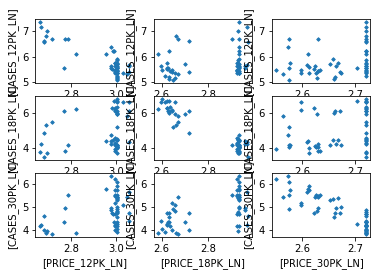

In [16]:
# 3.2.2 scatter plots
figure, axes = plt.subplots(3, 3)
df2.plot.scatter(x=['PRICE_12PK_LN'], y=['CASES_12PK_LN'], ax=axes[0,0], marker='D', s=6)
df2.plot.scatter(x=['PRICE_18PK_LN'], y=['CASES_12PK_LN'], ax=axes[0,1], marker='D', s=6)
df2.plot.scatter(x=['PRICE_30PK_LN'], y=['CASES_12PK_LN'], ax=axes[0,2], marker='D', s=6)
df2.plot.scatter(x=['PRICE_12PK_LN'], y=['CASES_18PK_LN'], ax=axes[1,0], marker='D', s=6)
df2.plot.scatter(x=['PRICE_18PK_LN'], y=['CASES_18PK_LN'], ax=axes[1,1], marker='D', s=6)
df2.plot.scatter(x=['PRICE_30PK_LN'], y=['CASES_18PK_LN'], ax=axes[1,2], marker='D', s=6)
df2.plot.scatter(x=['PRICE_12PK_LN'], y=['CASES_30PK_LN'], ax=axes[2,0], marker='D', s=6)
df2.plot.scatter(x=['PRICE_18PK_LN'], y=['CASES_30PK_LN'], ax=axes[2,1], marker='D', s=6)
df2.plot.scatter(x=['PRICE_30PK_LN'], y=['CASES_30PK_LN'], ax=axes[2,2], marker='D', s=6)

In [17]:
# 3.3 log-log model fit and summary
formula='CASES_18PK_LN ~ PRICE_18PK_LN'
res = model_fit_summary(formula, df2)
display(f'Std.Err.Reg. {np.sqrt(res.mse_resid).round(3)}')

                            OLS Regression Results                            
Dep. Variable:          CASES_18PK_LN   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     397.0
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.95e-25
Time:                        15:22:08   Log-Likelihood:                -19.040
No. Observations:                  52   AIC:                             42.08
Df Residuals:                      50   BIC:                             45.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.8313      0.946     25.201

'Std.Err.Reg. 0.356'

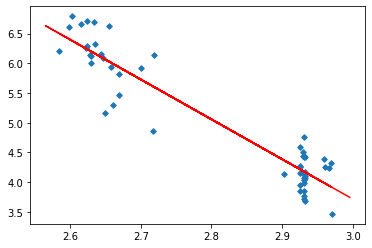

In [18]:
# 3.5 plot cases vs price with predicted and confidence intervals
x = df2['PRICE_18PK_LN']
y = df2['CASES_18PK_LN']
yp = res.predict(df2['PRICE_18PK_LN'])
line_fit(x, y, yp)

In [19]:
# 3.6 forecast table
x = df['Week'][52:]
y = df['PRICE_18PK_LN'][52:].round(3)
yp = res.get_prediction(df['PRICE_18PK_LN'][52:]).summary_frame().round(3)
yp['mean'].index+=52
yp['obs_ci_lower'].index+=52
yp['obs_ci_upper'].index+=52
df_fc = pd.DataFrame({'Obs#': x, 'PRICE_18PK_LN': y, 'Forecast': yp['mean'], 'Lower95%F': yp['obs_ci_lower'], 'Upper95%F': yp['obs_ci_upper']})
display(df_fc)

,Obs#,PRICE_18PK_LN,Forecast,Lower95%F,Upper95%F
52,53,2.565,6.633,5.893,7.373
53,54,2.639,6.136,5.405,6.866
54,55,2.708,5.673,4.949,6.398
55,56,2.773,5.240,4.518,5.962
56,57,2.833,4.834,4.112,5.556
57,58,2.890,4.451,3.727,5.175
58,59,2.944,4.088,3.361,4.816
59,60,2.996,3.744,3.011,4.477


In [20]:
# 3.7 forecast exp table
df_fc = pd.concat([x, np.exp(y), np.exp(yp['mean']), np.exp(yp['obs_ci_lower']), np.exp(yp['obs_ci_upper'])], axis=1).round(0)
display(df_fc)

,Week,PRICE_18PK_LN,mean,obs_ci_lower,obs_ci_upper
52,53,13.0,760.0,362.0,1592.0
53,54,14.0,462.0,223.0,959.0
54,55,15.0,291.0,141.0,601.0
55,56,16.0,189.0,92.0,388.0
56,57,17.0,126.0,61.0,259.0
57,58,18.0,86.0,42.0,177.0
58,59,19.0,60.0,29.0,123.0
59,60,20.0,42.0,20.0,88.0


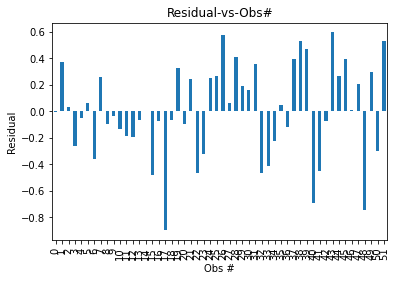

In [21]:
# 3.10.1 plot residual time series
residual_vs_obs(res.resid)

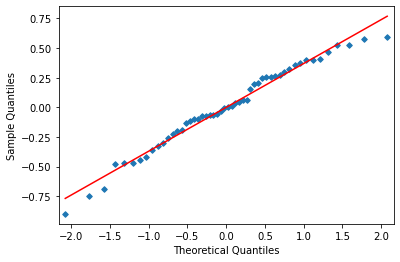

In [22]:
# 3.10.4 qqplot
fig = sm.qqplot(res.resid, line='r', marker='D', markersize=4)

## 4. Add two more predictors

In [23]:
# 4.1 prepare frame
df2 = df_[['CASES_18PK_LN', 'PRICE_12PK_LN', 'PRICE_18PK_LN', 'PRICE_30PK_LN']]

<AxesSubplot:xlabel='[PRICE_30PK_LN]', ylabel='[CASES_18PK_LN]'>

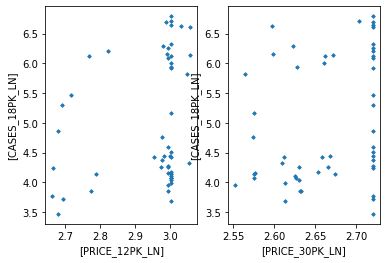

In [24]:
### 4.2 explore
figure, ax = plt.subplots(1, 2)
df2.plot.scatter(x=['PRICE_12PK_LN'], y=['CASES_18PK_LN'], ax=ax[0], marker='D', s=6)
df2.plot.scatter(x=['PRICE_30PK_LN'], y=['CASES_18PK_LN'], ax=ax[1], marker='D', s=6)

In [25]:
# 4.3 model fit and summary
formula = 'CASES_18PK_LN ~ PRICE_12PK_LN + PRICE_18PK_LN + PRICE_30PK_LN'
res = model_fit_summary(formula, df2)

                            OLS Regression Results                            
Dep. Variable:          CASES_18PK_LN   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           3.28e-28
Time:                        15:22:24   Log-Likelihood:                -5.6044
No. Observations:                  52   AIC:                             19.21
Df Residuals:                      48   BIC:                             27.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2667      3.024      3.395

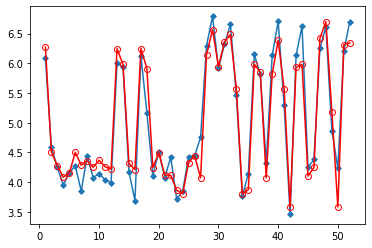

In [26]:
# 4.4 plot actual and predicted time series
x = df['Week'][:len(df2)]
y = df2['CASES_18PK_LN']
yp = res.predict(df2)
actual_and_predicted_vs_obs(x, y, yp)

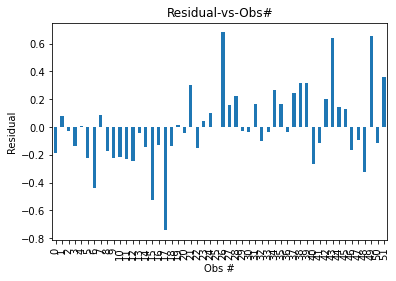

In [27]:
# 4.5 plot residual
residual_vs_obs(res.resid)

                            OLS Regression Results                            
Dep. Variable:          CASES_18PK_LN   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     226.7
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           4.41e-30
Time:                        15:22:36   Log-Likelihood:                 2.2744
No. Observations:                  52   AIC:                             5.451
Df Residuals:                      47   BIC:                             15.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2746      2.671      3.098

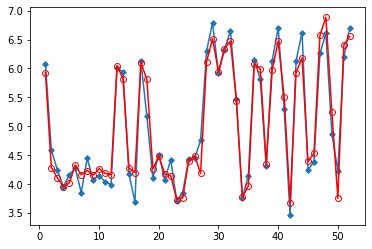

In [28]:
## 5. Add Week

# 5.1 prepare frame
df3 = df_[['Week', 'CASES_18PK_LN', 'PRICE_12PK_LN', 'PRICE_18PK_LN', 'PRICE_30PK_LN']]

# 5.2 model fit and summary
formula='CASES_18PK_LN ~ PRICE_12PK_LN + PRICE_18PK_LN + PRICE_30PK_LN + Week'
res = model_fit_summary(formula, df3)

# 5.3 plot cases vs price with predicted and confidence intervals
x = df3['Week']
y = df3['CASES_18PK_LN']
yp = res.predict(df3)
actual_and_predicted_vs_obs(x, y, yp)


